In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

Our equation for linear regression :-

L(W,B)= 1/n Σ (y-w.x-b)^2

take partial derivative w.r.t W dL/dW and B dL/dB

dL/dW = 1/n Σ (-2x)(y-w.x-b)

dL/dB= 1/n Σ (-2)(y-w.x-b)

W(j+1)=W(j) – r *(dL/dW)

B(j+1)=B(j) – r*(dL/dB)

iterate this till W(k) becomes nearly equal to W(k+1) and B(k) nearly equal to B(k+1).

After that find out predicted output on test data and calculate mean squared error.

<h2><font color='red'>[1.1] Loading the Boston Dataset</font></h2>

In [285]:
boston = load_boston()
X = load_boston().data
Y = load_boston().target
print(type(X))



<class 'numpy.ndarray'>


In [286]:
names = boston["feature_names"]
print(names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<h2><font color='red'>[1.2] Splitting data into Train and Test</font></h2>

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


 Vectorizing Numerical features

In [288]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<h2><font color='red'>[1.3] Applying SGD Regressor on Train and Test</font></h2>

In [289]:
clf = SGDRegressor(loss='squared_loss')
clf.fit(X_train, Y_train)
print(mean_squared_error(Y_train, clf.predict(X_train)))

19.224645051861707


In [290]:
import matplotlib.pyplot as plt
Y_pred = clf.predict(X_test)

In [291]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, clf.predict(X_train))
test_mse = mean_squared_error(Y_test, Y_pred)
print('Train Mean Square error: ', train_mse)
print('Test Mean Square error: ', test_mse)

Train Mean Square error:  19.224645051861707
Test Mean Square error:  29.877678170442312


In [300]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Regressor", "Train MSE", "Test MSE"]
table.add_row(['SGDRegressor', round(train_mse,2), round(test_mse,2)])

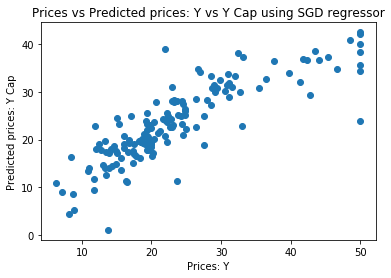

In [299]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: Y")
plt.ylabel("Predicted prices: Y Cap")
plt.title("Prices vs Predicted prices: Y vs Y Cap using SGD regressor")
plt.show()

<h2><font color='red'>[1.4] Applying Maunal SGD Regressor on Train and Test</font></h2>

In [294]:
iteration=100
lr_rate=0.01
k=100

training_data=pd.DataFrame(X_train)
training_data['price']=Y_train
training_data.head()
while iteration>=0: 
    idx = np.random.choice(np.arange(len(X_train)), k, replace=False)
    x = X_train[idx]
    y = Y_train[idx]
    W=np.random.normal(0,1,x.shape[1])
    B=0
    w,b,=W,B
    temp_vectors =np.zeros(shape=(1,13))
    temp_intercept =0
    
    for i in range(k):
        #partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))
        
        #partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))
        
        W=(w-lr_rate*(temp_vectors)/k)
        B=(b-lr_rate*(temp_intercept)/k)
        
        if(np.allclose(W,w)):
            print("**********")
            print(W)
    
    iteration-=1
    
print(W)
print(B)

[[-1.03140355  1.14471142 -0.36118597  1.08717814 -1.57413657  2.19810059
  -0.14402866 -3.27501921  2.16348632 -1.65923148 -1.71623125  0.858431
  -3.61519438]]
[22.08090168]


In [295]:
#prediction on x_test using manual SGD
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_train_manual=[]
for i in range(len(X_train)):
    val=np.dot(W,X_train[i])+B  #val= wTx+b
    y_train_manual.append(np.asscalar(val))
    
    
y_test_manual=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_test_manual.append(np.asscalar(val))

In [301]:
manual_train_mse = mean_squared_error(Y_train, y_train_manual)
manual_test_mse = mean_squared_error(Y_test, y_test_manual)
print('Manual Train Mean Square error: ', manual_train_mse)
print('Manual Test Mean Square error: ', manual_test_mse)

table.add_row(['Manual SGDRegressor', round(manual_train_mse,2), round(manual_test_mse,2)])

Manual Train Mean Square error:  19.158752449680495
Manual Test Mean Square error:  30.224755464272196


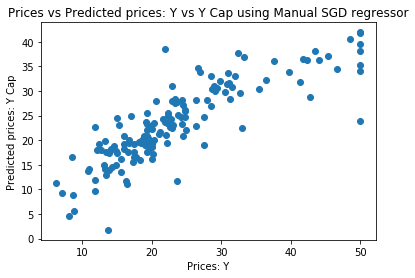

In [298]:
plt.scatter(Y_test, y_test_manual)
plt.xlabel("Prices: Y")
plt.ylabel("Predicted prices: Y Cap")
plt.title("Prices vs Predicted prices: Y vs Y Cap using Manual SGD regressor")
plt.show()

In [302]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
print(table)

+---------------------+-----------+----------+
|      Regressor      | Train MSE | Test MSE |
+---------------------+-----------+----------+
|     SGDRegressor    |   19.22   |  29.88   |
| Manual SGDRegressor |   19.16   |  30.22   |
+---------------------+-----------+----------+
